NameError: name 'device' is not defined

In [3]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the Fashion MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize the dataset
])

# Load the dataset
full_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)

# Splitting the dataset into train, validation and test sets
train_size = int(0.7 * len(full_dataset))
val_size = int(0.1 * len(full_dataset))
test_size = len(full_dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, val_size, test_size])


the labellings are as mentioned above

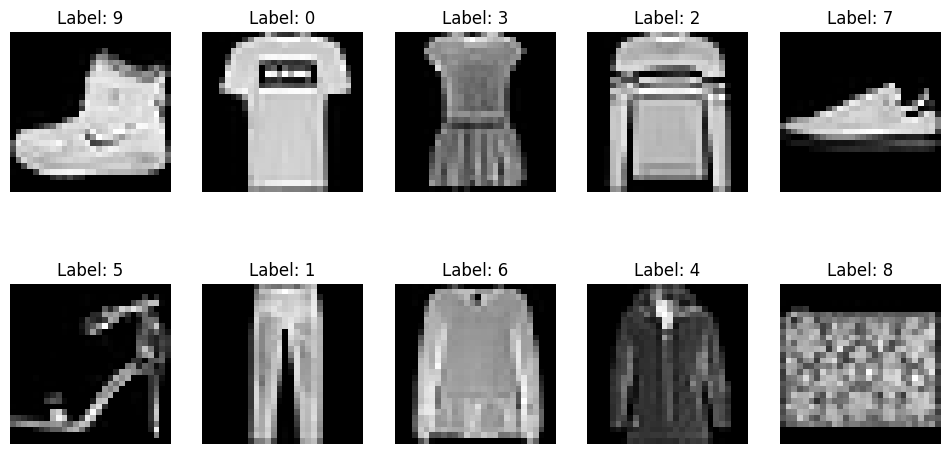

Clothing types:
0: T-shirt/top
1: Trouser
2: Pullover
3: Dress
4: Coat
5: Sandal
6: Shirt
7: Sneaker
8: Bag
9: Ankle boot


In [4]:
import matplotlib.pyplot as plt
import torch

def visualize_one_per_label(dataset, num_classes=10):
    samples_per_class = {}
    
    # Loop through the dataset until we have one sample per class
    for img, label in dataset:
        if label not in samples_per_class:
            samples_per_class[label] = img
        if len(samples_per_class) == num_classes:
            break

    plt.figure(figsize=(12, 6))
    for i, (label, img) in enumerate(samples_per_class.items()):
        plt.subplot(2, 5, i + 1)
        plt.imshow(img.squeeze(), cmap='gray')
        plt.title(f'Label: {label}')
        plt.axis('off')
    plt.show()

# Call the function with your dataset
visualize_one_per_label(full_dataset)


# Step 3: List the clothing types represented by each class
clothing_types = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

print("Clothing types:")
for class_label, clothing_type in clothing_types.items():
    print(f"{class_label}: {clothing_type}")

the labellings are as mentioned above

In [5]:
print(f"Training set size: {len(train_dataset)}")
print(f"Validation set size: {len(val_dataset)}")
print(f"Test set size: {len(test_dataset)}")

Training set size: 42000
Validation set size: 6000
Test set size: 12000


70:10:20 split is done


In [6]:
import torch

# Set up device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f"Using device: {device}")

Using device: cuda


In [7]:

import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import sys
import os



In [8]:
# DataLoader
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [8]:


sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../models/AutoEncoders')))
from CNNAutoEncoder import CnnAutoencoder ,CnnAuto

Epoch [1/20], Train Loss: 0.6864, Val Loss: 0.6824
Epoch [2/20], Train Loss: 0.6813, Val Loss: 0.6823
Epoch [3/20], Train Loss: 0.6813, Val Loss: 0.6816
Epoch [4/20], Train Loss: 0.6020, Val Loss: 0.5910
Epoch [5/20], Train Loss: 0.5883, Val Loss: 0.5879
Epoch [6/20], Train Loss: 0.5864, Val Loss: 0.5868
Epoch [7/20], Train Loss: 0.5854, Val Loss: 0.5861
Epoch [8/20], Train Loss: 0.5848, Val Loss: 0.5856
Epoch [9/20], Train Loss: 0.5844, Val Loss: 0.5853
Epoch [10/20], Train Loss: 0.5840, Val Loss: 0.5850
Epoch [11/20], Train Loss: 0.5838, Val Loss: 0.5849
Epoch [12/20], Train Loss: 0.5835, Val Loss: 0.5846
Epoch [13/20], Train Loss: 0.5833, Val Loss: 0.5846
Epoch [14/20], Train Loss: 0.5831, Val Loss: 0.5844
Epoch [15/20], Train Loss: 0.5830, Val Loss: 0.5842
Epoch [16/20], Train Loss: 0.5828, Val Loss: 0.5843
Epoch [17/20], Train Loss: 0.5827, Val Loss: 0.5842
Epoch [18/20], Train Loss: 0.5827, Val Loss: 0.5841
Epoch [19/20], Train Loss: 0.5826, Val Loss: 0.5841
Epoch [20/20], Train 

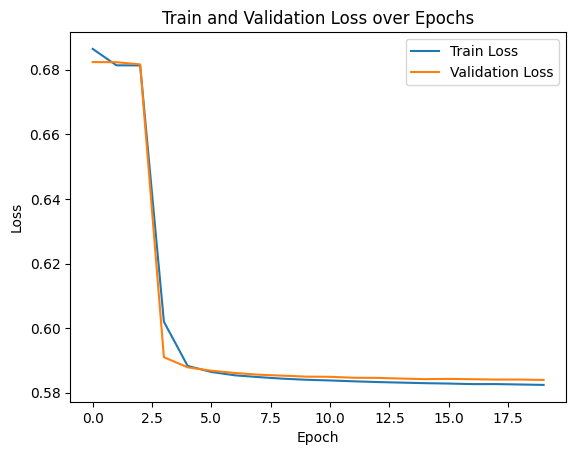

In [16]:
# Instantiate the model
latent_dim = 32  # Example latent dimension
model = CnnAutoencoder(latent_dim).to(device)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 20  # Set the number of epochs
train_loss_list = []
val_loss_list = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for data in train_loader:
        inputs, _ = data
        inputs = inputs.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Compute loss
        loss = criterion(outputs, inputs)
        train_loss += loss.item()

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    # Average loss for this epoch
    train_loss /= len(train_loader)
    train_loss_list.append(train_loss)

    # Validation step
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for data in val_loader:
            inputs, _ = data
            inputs = inputs.to(device)

            # Forward pass
            outputs = model(inputs)

            # Compute loss
            loss = criterion(outputs, inputs)
            val_loss += loss.item()

    # Average loss for validation
    val_loss /= len(val_loader)
    val_loss_list.append(val_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

# Plot train and validation loss
plt.plot(train_loss_list, label='Train Loss')
plt.plot(val_loss_list, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Loss over Epochs')
plt.legend()
plt.show()

Maybe 10 epochs are more than enough looking at that sharp elbow drop

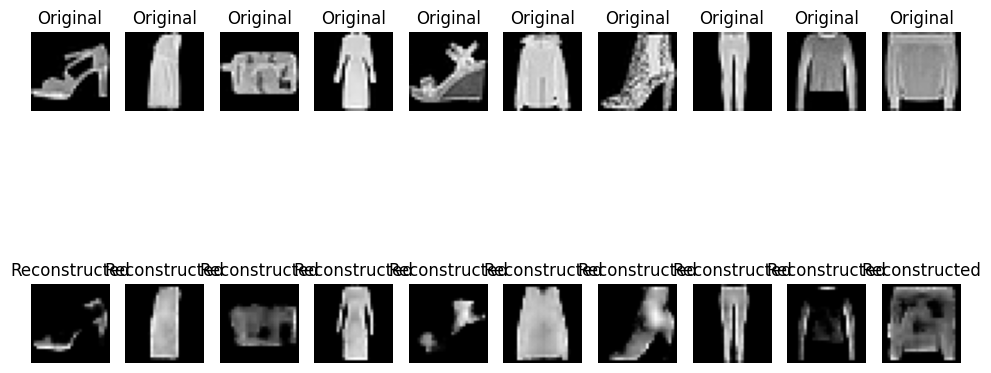

In [ ]:
from sklearn.decomposition import PCA


# Function to visualize original and reconstructed images
def visualize_reconstruction(model, test_loader, num_images=10):
    model.eval()
    images = []
    reconstructed_images = []
    
    with torch.no_grad():
        for i, data in enumerate(test_loader):
            inputs, _ = data
            inputs = inputs.to(device)
            outputs = model(inputs)
            
            images.append(inputs.cpu().numpy())
            reconstructed_images.append(outputs.cpu().numpy())
            if i + 1 >= num_images:  # Limit to num_images
                break
    
    # Convert lists to arrays
    images = np.concatenate(images)[:num_images]
    reconstructed_images = np.concatenate(reconstructed_images)[:num_images]
    
    # Plot original and reconstructed images
    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        # Original images
        ax = plt.subplot(2, num_images, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        plt.title("Original")
        plt.axis('off')

        # Reconstructed images
        ax = plt.subplot(2, num_images, i + 1 + num_images)
        plt.imshow(reconstructed_images[i].squeeze(), cmap='gray')
        plt.title("Reconstructed")
        plt.axis('off')
    
    plt.show()

visualize_reconstruction(model, test_loader)

it seems to only be taking the most distinguishing characteristic of each label , like taking the long sleeves of pullover (label 2) and taking the higher skeletonised ankle of sandal, the rest of the reconstructions seem fine to me.

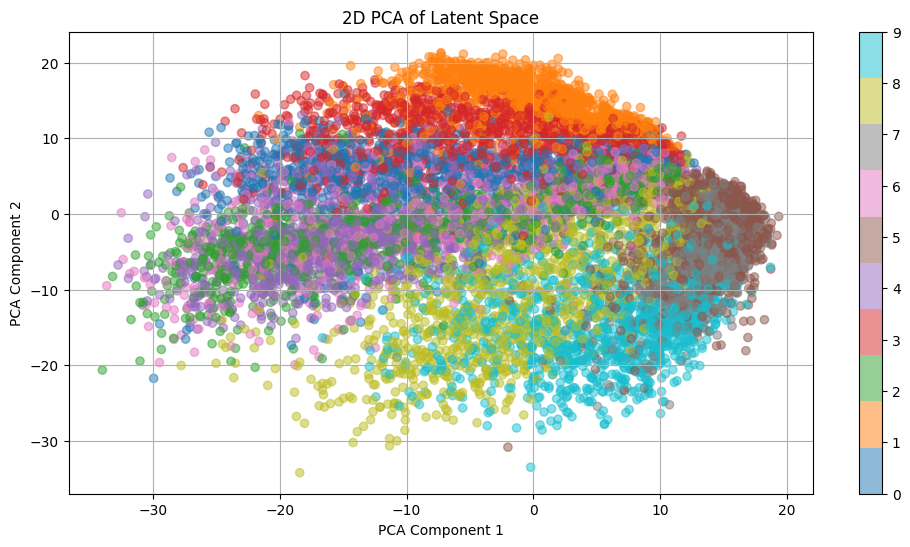

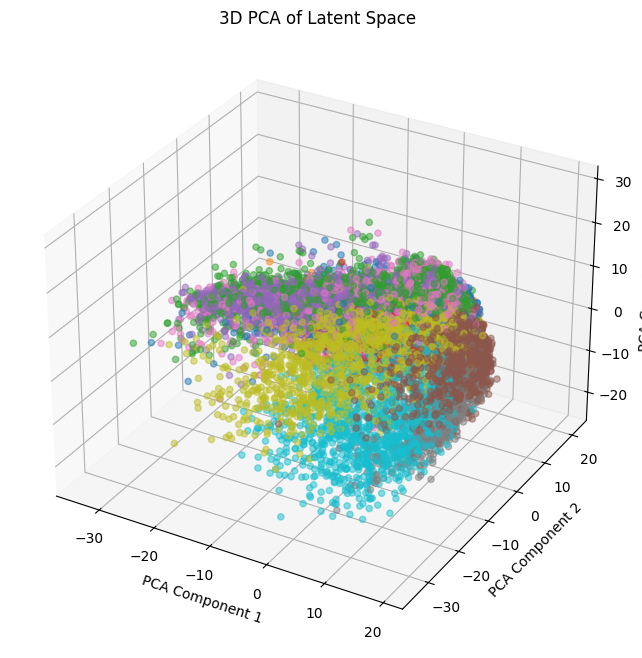

In [19]:
# Function to visualize latent space representations using PCA
def visualize_latent_space(model, test_loader, latent_dim):
    model.eval()
    encoded_samples = []
    labels = []

    with torch.no_grad():
        for data in test_loader:
            inputs, label = data
            inputs = inputs.to(device)

            # Encode the images
            encoded = model.encode(inputs).view(-1, latent_dim)  # Flatten for PCA
            encoded_samples.append(encoded.cpu().numpy())
            labels.extend(label.numpy())

    # Combine all encoded samples
    encoded_samples = np.concatenate(encoded_samples)

    # Perform PCA to reduce dimensions for visualization
    pca_2d = PCA(n_components=2)
    pca_3d = PCA(n_components=3)

    # Fit PCA on the encoded samples
    encoded_samples_2d = pca_2d.fit_transform(encoded_samples)
    encoded_samples_3d = pca_3d.fit_transform(encoded_samples)

    # Plotting 2D representation
    plt.figure(figsize=(12, 6))
    scatter = plt.scatter(encoded_samples_2d[:, 0], encoded_samples_2d[:, 1], c=labels, cmap='tab10', alpha=0.5)
    plt.colorbar(scatter)
    plt.title('2D PCA of Latent Space')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.grid()
    plt.show()

    # Plotting 3D representation
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(encoded_samples_3d[:, 0], encoded_samples_3d[:, 1], encoded_samples_3d[:, 2], c=labels, cmap='tab10', alpha=0.5)
    ax.set_title('3D PCA of Latent Space')
    ax.set_xlabel('PCA Component 1')
    ax.set_ylabel('PCA Component 2')
    ax.set_zlabel('PCA Component 3')
    plt.show()


visualize_latent_space(model, test_loader, latent_dim)

I can see these forming elliptical clusters emerging from a singular point in the 3d pca component 2 , but there seems to be a lot of overlap in the 2d visualisation to make any meaningful inferences 


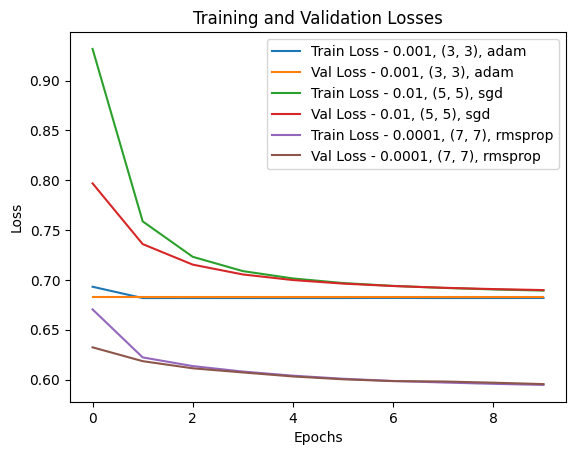

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Function to train and validate model
def train_and_evaluate_model(learning_rate, kernel_size, optimizer_choice, num_epochs=10):
    model = CnnAutoencoder(latent_dim=latent_dim)  # Define your model here
    optimizer = None
    
    if optimizer_choice == 'adam':
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    elif optimizer_choice == 'sgd':
        optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    elif optimizer_choice == 'rmsprop':
        optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)

    criterion = nn.MSELoss()
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0

        # Training loop
        for data in train_loader:  # Use your train DataLoader
            inputs, _ = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, inputs)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        train_losses.append(train_loss / len(train_loader))

        # Validation loop
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for data in val_loader:  # Use your validation DataLoader
                inputs, _ = data
                outputs = model(inputs)
                loss = criterion(outputs, inputs)
                val_loss += loss.item()

        val_losses.append(val_loss / len(val_loader))

    return train_losses, val_losses

# Example of hyperparameter combinations
hyperparameter_combinations = [
    (0.001, (3, 3), 'adam'),
    (0.01, (5, 5), 'sgd'),
    (0.0001, (7, 7), 'rmsprop')
]

# Plot losses for each combination
for lr, ks, opt in hyperparameter_combinations:
    train_losses, val_losses = train_and_evaluate_model(lr, ks, opt)
    
    plt.plot(train_losses, label=f'Train Loss - {lr}, {ks}, {opt}')
    plt.plot(val_losses, label=f'Val Loss - {lr}, {ks}, {opt}')

plt.title('Training and Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

looks like lr = 0.0001 , kernel size 7 and rmsprop as optimiser are our chosen hyper parameters.

In [9]:
def train_and_evaluate_model(num_layers, latent_dim,train_loader, val_loader ,learning_rate=0.0001, optimizer_choice='rmsprop', num_epochs=10 ):
    model = CnnAuto(latent_dim, num_layers)
    optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
    criterion = nn.MSELoss()
    
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for data in train_loader:
            inputs, _ = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, inputs)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        train_losses.append(train_loss / len(train_loader))

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for data in val_loader:
                inputs, _ = data
                outputs = model(inputs)
                loss = criterion(outputs, inputs)
                val_loss += loss.item()

        val_losses.append(val_loss / len(val_loader))

    return train_losses, val_losses

# Experimenting with different layer configurations

latent_dim = 32
layer_configs = [2, 4, 6]  # Number of layers for the different models
all_train_losses = []
all_val_losses = []

for num_layers in layer_configs:
    train_losses, val_losses = train_and_evaluate_model(num_layers, latent_dim,train_loader ,val_loader)
    all_train_losses.append(train_losses)
    all_val_losses.append(val_losses)

# Plotting loss curves
for i, num_layers in enumerate(layer_configs):
    plt.plot(all_train_losses[i], label=f'Train Loss - {num_layers} Layers')
    plt.plot(all_val_losses[i], label=f'Val Loss - {num_layers} Layers', linestyle='--')

plt.title('Training and Validation Losses for Different Layer Configurations')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

RuntimeError: mat1 and mat2 shapes cannot be multiplied (64x1568 and 32768x32)

In [9]:
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../models/AutoEncoders')))
from AutoEncoder import AutoEncoder

In [10]:
# Step 1: Load the Fashion MNIST dataset
transform1 = transforms.Compose([
    transforms.Resize((28, 28)),  # Resize images to 128x128
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the dataset
full_dataset1 = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform1)

# Splitting the dataset into train, validation and test sets
train_size1 = int(0.7 * len(full_dataset1))
val_size1 = int(0.1 * len(full_dataset1))
test_size1 = len(full_dataset1) - train_size - val_size

train_dataset1, val_dataset1, test_dataset1 = torch.utils.data.random_split(full_dataset1, [train_size1, val_size1, test_size1])


# DataLoader
train_loader1 = DataLoader(train_dataset1, batch_size=64, shuffle=True)
val_loader1 = DataLoader(val_dataset1, batch_size=64, shuffle=False)
test_loader1 = DataLoader(test_dataset1, batch_size=64, shuffle=False)

Epoch 1/1, Loss: 1.3601
Epoch 1/10, Train Loss: 0.6814, Val Loss: 0.6828
Epoch 1/1, Loss: 0.6814
Epoch 2/10, Train Loss: 0.6815, Val Loss: 0.6828
Epoch 1/1, Loss: 0.6814
Epoch 3/10, Train Loss: 0.6815, Val Loss: 0.6828
Epoch 1/1, Loss: 0.6814
Epoch 4/10, Train Loss: 0.6814, Val Loss: 0.6828
Epoch 1/1, Loss: 0.6814
Epoch 5/10, Train Loss: 0.6814, Val Loss: 0.6828
Epoch 1/1, Loss: 0.6814
Epoch 6/10, Train Loss: 0.6814, Val Loss: 0.6828
Epoch 1/1, Loss: 0.6814
Epoch 7/10, Train Loss: 0.6815, Val Loss: 0.6828
Epoch 1/1, Loss: 0.6814
Epoch 8/10, Train Loss: 0.6815, Val Loss: 0.6828
Epoch 1/1, Loss: 0.6814
Epoch 9/10, Train Loss: 0.6814, Val Loss: 0.6828
Epoch 1/1, Loss: 0.6814
Epoch 10/10, Train Loss: 0.6814, Val Loss: 0.6828


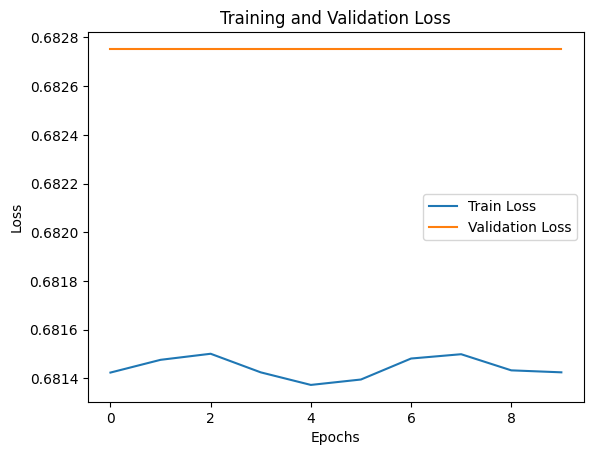

In [13]:
def train_autoencoder(model, train_loader, val_loader, epochs=1):
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        # Training phase
        model.fit(np.concatenate([inputs.view(-1, 28 * 28).numpy() for inputs, _ in train_loader]))

        # Calculate training loss
        train_loss = 0.0
        for data in train_loader:
            inputs, _ = data
            inputs = inputs.view(-1, 28 * 28).numpy()  # Flatten the input images
            reconstructed = model.reconstruct(inputs)
            loss = np.mean(np.square(inputs - reconstructed))
            train_loss += loss
        
        train_loss /= len(train_loader)
        train_losses.append(train_loss)

        # Validation phase
        val_loss = 0.0
        for data in val_loader:
            inputs, _ = data
            inputs = inputs.view(-1, 28 * 28).numpy()  # Flatten the input images
            reconstructed = model.reconstruct(inputs)
            loss = np.mean(np.square(inputs - reconstructed))
            val_loss += loss

        val_loss /= len(val_loader)
        val_losses.append(val_loss)

        # Print loss every 50 epochs for monitoring
        if epoch % 1 == 0:
            print(f'Epoch {epoch + 1}/{epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

    return train_losses, val_losses

# Initialize the autoencoder
autoencoder = AutoEncoder(input_size=28*28, hidden_size=256, latent_size=32, learning_rate=0.001, epochs=1)

# Train the autoencoder
train_losses, val_losses = train_autoencoder(autoencoder, train_loader1, val_loader1, epochs=10)

# Plotting loss curves
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

loss-wise it is doing worse than cnn encoder , also the graph not going down means its not learning properly

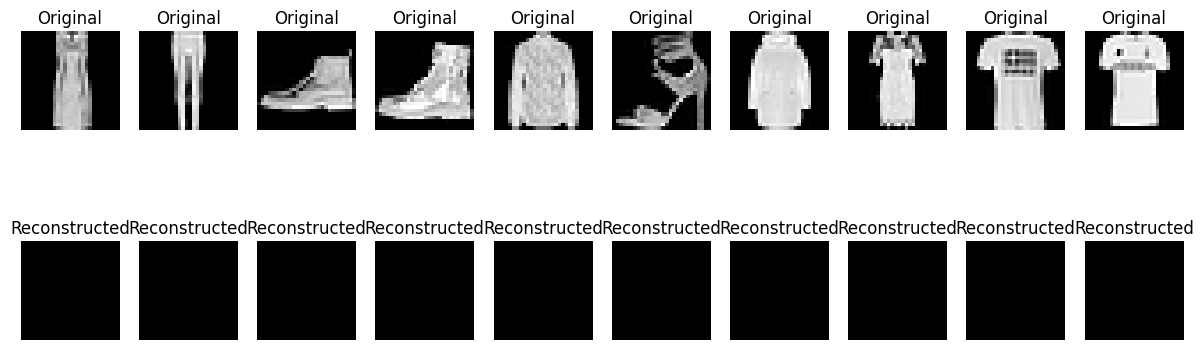

In [14]:
import matplotlib.pyplot as plt

def visualize_reconstruction(autoencoder, test_loader):
    # Get a batch of test images
    for data in test_loader:
        inputs, _ = data
        break  # Only take the first batch for visualization

    # Flatten the images for the autoencoder
    inputs_flat = inputs.view(-1, 28 * 28).numpy()  # Change to 128*128 if using that size

    # Reconstruct the images
    reconstructed = autoencoder.reconstruct(inputs_flat)

    # Convert back to images for visualization
    reconstructed_images = reconstructed.reshape(-1, 1, 28, 28)  # Change to 128 if using that size
    original_images = inputs.numpy()  # Keep original shape

    # Set up the plot
    num_images = 10  # Number of images to visualize
    fig, axes = plt.subplots(2, num_images, figsize=(15, 5))
    
    for i in range(num_images):
        # Original images
        axes[0, i].imshow(original_images[i][0], cmap='gray')
        axes[0, i].axis('off')
        axes[0, i].set_title("Original")

        # Reconstructed images
        axes[1, i].imshow(reconstructed_images[i][0], cmap='gray')
        axes[1, i].axis('off')
        axes[1, i].set_title("Reconstructed")

    plt.show()

# Call the visualization function
visualize_reconstruction(autoencoder, test_loader1)

poor reconstruction

In [15]:
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../models/AutoEncoders')))
from PCA import PcaAutoencoder

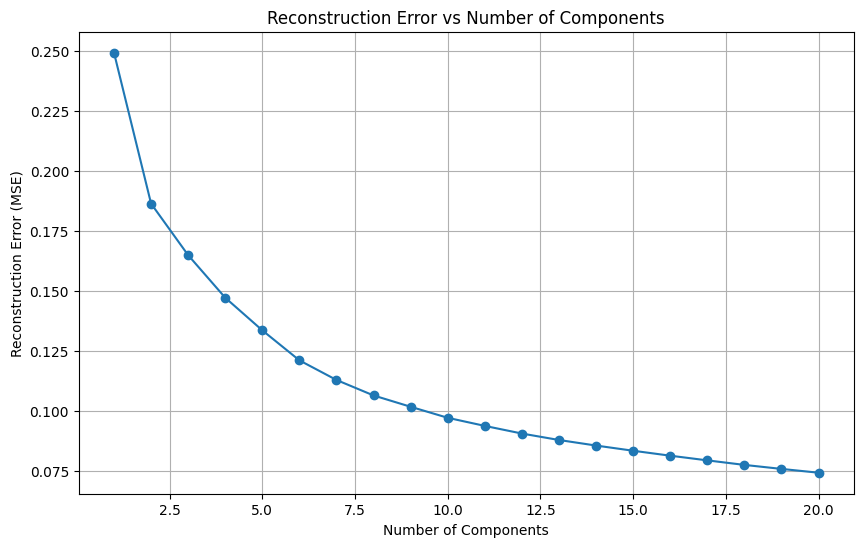

Optimal number of components: 20


In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

def find_optimal_components(X_val):
    errors = []
    max_components = 20  # You can adjust this limit

    for n_components in range(1, max_components + 1):
        pca_autoencoder = PcaAutoencoder(n_components=n_components)
        pca_autoencoder.fit(X_val)

        # Encode and then reconstruct the validation data
        Z = pca_autoencoder.encode(X_val)
        X_reconstructed = pca_autoencoder.forward(Z)

        # Calculate MSE
        error = mean_squared_error(X_val, X_reconstructed)
        errors.append(error)

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_components + 1), errors, marker='o')
    plt.title('Reconstruction Error vs Number of Components')
    plt.xlabel('Number of Components')
    plt.ylabel('Reconstruction Error (MSE)')
    plt.grid()
    plt.show()

    return np.argmin(errors) + 1  # Return the optimal number of components (koptimal)

# Assuming X_val is your validation dataset (reshaped if needed)
koptimal = find_optimal_components(np.concatenate([inputs.view(-1, 28 * 28).numpy() for inputs, _ in val_loader1]))
print(f'Optimal number of components: {koptimal}')

from the elbow point it seems k = 10 is a decently good number of components after which the loss decay is very less

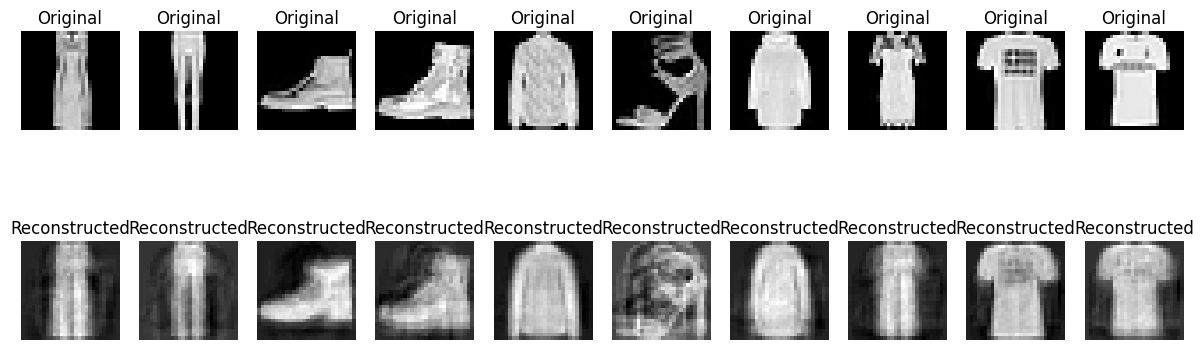

In [20]:
def visualize_pca_reconstruction(test_loader, koptimal):
    # Get a batch of test images
    for data in test_loader:
        inputs, _ = data
        break  # Only take the first batch for visualization

    # Flatten the images for PCA autoencoder
    inputs_flat = inputs.view(-1, 28 * 28).numpy()  # Adjust if necessary

    # Train PCA Autoencoder with koptimal components
    pca_autoencoder = PcaAutoencoder(n_components=koptimal)
    pca_autoencoder.fit(inputs_flat)

    # Reconstruct the images
    Z = pca_autoencoder.encode(inputs_flat)
    reconstructed = pca_autoencoder.forward(Z)

    # Convert back to images for visualization
    original_images = inputs.numpy()
    reconstructed_images = reconstructed.reshape(-1, 1, 28, 28)  # Adjust if necessary

    # Set up the plot
    num_images = 10  # Number of images to visualize
    fig, axes = plt.subplots(2, num_images, figsize=(15, 5))
    
    for i in range(num_images):
        # Original images
        axes[0, i].imshow(original_images[i][0], cmap='gray')
        axes[0, i].axis('off')
        axes[0, i].set_title("Original")

        # Reconstructed images
        axes[1, i].imshow(reconstructed_images[i][0], cmap='gray')
        axes[1, i].axis('off')
        axes[1, i].set_title("Reconstructed")

    plt.show()

# Call the visualization function
visualize_pca_reconstruction(test_loader1, 10)

fairly good reconstructions of the original images , i can make out more details as compared to cnn and obviously mlpautoencoder ( it performed poorly)